# ImageNet: VGGNet, ResNet, Inception, and Xception with Keras

Explore an unsupervised, deep learning-based model. 

We are going to build a model-to-model recommender using thumbnail images for models as our input and the visual similarity between models as our recommendation score. 

Since our goal is to measure visual similarity, we will need to generate features from our images and then calculate some similarity measure between different images using said features. Back in the day, maybe one would employ fancy wavelets or SIFT keypoints or something for creating features, but this is the Era of Deep Learning and manual feature extraction is for old people.

Staying on-trend, we will use a pretrained neural network (NN) to extract features. The NN was originally trained to classify images among 1000 labels (e.g. "dog", "train", etc...). We'll chop off the last 3 fully-connected layers of the network which do the final mapping between deep features and class labels and use the fourth-to-last layer as a long feature vector describing our images.

Thankfully, all of this is extremely simple to do with the pretrained models in Keras. Keras allows one to easily build deep learning models on top of either Tensorflow or Theano. Keras also now comes with pretrained models that can be loaded and used. For more information about the available models, visit the Applications section of the documentation. For our purposes, we'll use the VGG16 model because that's what other people seemed to use and I don't know enough to have a compelling reason to stray from the norm.

The goal of this image classification challenge is to train a model that can correctly classify an input image into 1,000 separate object categories.

Models are trained on ~1.2 million training images with another 50,000 images for validation and 100,000 images for testing.

These 1,000 image categories represent object classes that we encounter in our day-to-day lives, such as species of dogs, cats, various household objects, vehicle types, and much more. You can find the full list of object categories in the ILSVRC challenge here.

When it comes to image classification, the ImageNet challenge is the de facto benchmark for computer vision classification algorithms — and the leaderboard for this challenge has been dominated by Convolutional Neural Networks and deep learning techniques since 2012.

The state-of-the-art pre-trained networks included in the Keras core library represent some of the highest performing Convolutional Neural Networks on the ImageNet challenge over the past few years. These networks also demonstrate a strong ability to generalize to images outside the ImageNet dataset via transfer learning, such as feature extraction and fine-tuning.

### What is ImageNet?
ImageNet is formally a project aimed at (manually) labeling and categorizing images into almost 22,000 separate object categories for the purpose of computer vision research.

However, when we hear the term “ImageNet” in the context of deep learning and Convolutional Neural Networks, we are likely referring to the ImageNet Large Scale Visual Recognition Challenge, or ILSVRC for short.

The goal of this image classification challenge is to train a model that can correctly classify an input image into 1,000 separate object categories.

Models are trained on ~1.2 million training images with another 50,000 images for validation and 100,000 images for testing.

These 1,000 image categories represent object classes that we encounter in our day-to-day lives, such as species of dogs, cats, various household objects, vehicle types, and much more. You can find the full list of object categories in the ILSVRC challenge here.

When it comes to image classification, the ImageNet challenge is the de facto benchmark for computer vision classification algorithms — and the leaderboard for this challenge has been dominated by Convolutional Neural Networks and deep learning techniques since 2012.

The state-of-the-art pre-trained networks included in the Keras core library represent some of the highest performing Convolutional Neural Networks on the ImageNet challenge over the past few years. These networks also demonstrate a strong ability to generalize to images outside the ImageNet dataset via transfer learning, such as feature extraction and fine-tuning.

## VGG16 & VGG19
In 2014, 16 and 19 layer networks were considered very deep (although we now have the ResNet architecture which can be successfully trained at depths of 50-200 for ImageNet and over 1,000 for CIFAR-10).

Simonyan and Zisserman found training VGG16 and VGG19 challenging (specifically regarding convergence on the deeper networks), so in order to make training easier, they first trained smaller versions of VGG with less weight layers (columns A and C) first.

The smaller networks converged and were then used as initializations for the larger, deeper networks — this process is called pre-training.

While making logical sense, pre-training is a very time consuming, tedious task, requiring an entire network to be trained before it can serve as an initialization for a deeper network.

We no longer use pre-training (in most cases) and instead prefer Xaiver/Glorot initialization or MSRA initialization (sometimes called He et al. initialization from the paper, Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification). You can read more about the importance of weight initialization and the convergence of deep neural networks inside All you need is a good init, Mishkin and Matas (2015).

Unfortunately, there are two major drawbacks with VGGNet:

It is painfully slow to train.
The network architecture weights themselves are quite large (in terms of disk/bandwidth).
Due to its depth and number of fully-connected nodes, VGG is over 533MB for VGG16 and 574MB for VGG19. This makes deploying VGG a tiresome task.

We still use VGG in many deep learning image classification problems; however, smaller network architectures are often more desirable (such as SqueezeNet, GoogLeNet, etc.).


## ResNet50
Unlike traditional sequential network architectures such as AlexNet, OverFeat, and VGG, ResNet is instead a form of “exotic architecture” that relies on micro-architecture modules (also called “network-in-network architectures”).

The term micro-architecture refers to the set of “building blocks” used to construct the network. A collection of micro-architecture building blocks (along with your standard CONV, POOL, etc. layers) leads to the macro-architecture (i.e,. the end network itself).

First introduced by He et al. in their 2015 paper, Deep Residual Learning for Image Recognition, the ResNet architecture has become a seminal work, demonstrating that extremely deep networks can be trained using standard SGD (and a reasonable initialization function) through the use of residual modules:

Further accuracy can be obtained by updating the residual module to use identity mappings, as demonstrated in their 2016 followup publication, Identity Mappings in Deep Residual Networks:

That said, keep in mind that the ResNet50 (as in 50 weight layers) implementation in the Keras core is based on the former 2015 paper.

Even though ResNet is much deeper than VGG16 and VGG19, the model size is actually substantially smaller due to the usage of global average pooling rather than fully-connected layers — this reduces the model size down to 102MB for ResNet50.

## Inception V3
The “Inception” micro-architecture was first introduced by Szegedy et al. in their 2014 paper, Going Deeper with Convolutions:

The goal of the inception module is to act as a “multi-level feature extractor” by computing 1×1, 3×3, and 5×5 convolutions within the same module of the network — the output of these filters are then stacked along the channel dimension and before being fed into the next layer in the network.

The original incarnation of this architecture was called GoogLeNet, but subsequent manifestations have simply been called Inception vN where N refers to the version number put out by Google.

The Inception V3 architecture included in the Keras core comes from the later publication by Szegedy et al., Rethinking the Inception Architecture for Computer Vision (2015) which proposes updates to the inception module to further boost ImageNet classification accuracy.

The weights for Inception V3 are smaller than both VGG and ResNet, coming in at 96MB.

## Xception
Xception was proposed by none other than François Chollet himself, the creator and chief maintainer of the Keras library.

Xception is an extension of the Inception architecture which replaces the standard Inception modules with depthwise separable convolutions.

The original publication, Xception: Deep Learning with Depthwise Separable Convolutions can be found here.

Xception sports the smallest weight serialization at only 91MB.

## Import Libraries

In [39]:
import sys, requests, os, glob, pickle, time, PIL, pprint
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd

from IPython.display import display, Image, HTML
from keras.models import load_model
from keras.applications import imagenet_utils
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG19
from keras.applications import InceptionResNetV2
from keras.applications import imagenet_utils
from keras.preprocessing import image as kimage
from scipy.sparse import lil_matrix as little_matrix
from skimage import io
from matplotlib import pyplot

sys.path.append('../')

## Read Sample Image

In [2]:
file = './gauges/gauge_rot_3.png'
img = io.imread(file)
img.shape

(150, 150, 4)

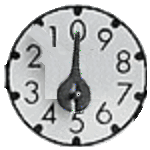

In [3]:
Image(filename=file) 

In [4]:
img = kimage.load_img(file, target_size=(224, 224))
x = kimage.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)

(1, 224, 224, 3)


We see that the image can be represented as a 3D matrix through two spatial dimensions (224 x 224) and then a third RGB dimension. We have to do a couple of preprocessing steps before feeding an image through the model. The images must be resized to 224 x 224, the color channels must be normalized, and an extra dimension must be added due to Keras expecting to recieve multiple models. Thankfully, Keras has built-in functions to handle most of this.

## Define NN models with imagenet weights

In [40]:
model_vgg16 = VGG16(include_top=False, weights='imagenet')
model_vgg19 = VGG19(include_top=False, weights='imagenet')
model_resnet50 = ResNet50(include_top=False, weights='imagenet')
model_inception = InceptionV3(include_top=False, weights='imagenet')
model_inception_res_net = InceptionResNetV2(include_top=False, weights='imagenet')
model_xception = Xception(include_top=False, weights='imagenet')

219070464/219055592 [==============================] - 28s 0us/step


### Prediction for one image

In [6]:
# VGG 16
pred_vgg16 = model_vgg16.predict(x)
print(pred_vgg16.shape)
print(pred_vgg16.ravel().shape)

(1, 7, 7, 512)
(25088,)


In [7]:
# VGG 19
pred_vgg19 = model_vgg19.predict(x)
print(pred_vgg19.shape)
# Return a contiguous flattened array.
print(pred_vgg19.ravel().shape)

(1, 7, 7, 512)
(25088,)


In [8]:
# ResNet50
pred_resnet50 = model_resnet50.predict(x)
print(pred_resnet50.shape)
# Return a contiguous flattened array.
print(pred_resnet50.ravel().shape)

(1, 7, 7, 2048)
(100352,)


In [9]:
# InceptionV3
pred_inception = model_inception.predict(x)
print(pred_inception.shape)
print(pred_inception.ravel().shape)

(1, 5, 5, 2048)
(51200,)


In [10]:
# Xception
pred_xception = model_xception.predict(x)
print(pred_xception.shape)
print(pred_xception.ravel().shape)

(1, 7, 7, 2048)
(100352,)


In [41]:
# InceptionResNetV2
pred_inception_res_net = model_inception_res_net.predict(x)
print(pred_inception_res_net.shape)
print(pred_inception_res_net.ravel().shape)

(1, 5, 5, 1536)
(38400,)


### How long does it take to run a single model through the NN

In [11]:
%%timeit -n25
pred_vgg16 = model_vgg16.predict(x)
# VGG 16

25 loops, best of 3: 214 ms per loop


In [12]:
%%timeit -n25
pred_vgg19 = model_vgg19.predict(x) 
# VGG 19

25 loops, best of 3: 275 ms per loop


In [13]:
%%timeit -n25
pred_resnet50 = model_resnet50.predict(x) 
# ResNet50

25 loops, best of 3: 197 ms per loop


In [14]:
%%timeit -n25
pred_inception = model_inception.predict(x)
# InceptionV3

25 loops, best of 3: 114 ms per loop


In [15]:
%%timeit -n25
pred_xception = model_xception.predict(x)
# Xception

25 loops, best of 3: 167 ms per loop


### Feed images through NN
With our set of valid model IDs in hand, we can now run through the long process of loading in all of the image files, preprocessing them, and running them through the VGG prediction. This takes a long time, and certain steps blowup memory. I've decided to batch things up below and include some print statements so that one can track progress. Beware: this takes a long time!

In [43]:
idx_to_mid = {}
directory = 'gauges'

def train_neural_network(pred, model):
    # Iterate over the folder to catalog the images
    items=[]
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            items.append(filename)
    # Define variables for training
    batch_size = 360
    min_idx = 0
    max_idx = min_idx + batch_size
    total_max = len(items)
    print(total_max)
    n_dims = pred.ravel().shape[0]
    px = 224
    # Initialize predictions matrix
    preds = little_matrix((len(items), n_dims))

    while min_idx < total_max - 1:
        t0 = time.time()
        X = np.zeros(((max_idx - min_idx), px, px, 3))
        # For each file in batch, 
        # load as row into X
        for i in range(min_idx, max_idx):
            item = items[i]
            idx_to_mid[i] = item

            image='./'+ directory +'/'+item
            img = kimage.load_img(image, target_size=(px, px))
            img_array = kimage.img_to_array(img)

            X[i - min_idx, :, :, :] = img_array
            if i % 200 == 0 and i != 0:
                t1 = time.time()
                print('{}: {}'.format(i, (t1 - t0) / i))
                t0 = time.time()

        max_idx = i
        t1 = time.time()
        print('{}: {}'.format(i, (t1 - t0) / i))

        t0 = time.time()
        X = preprocess_input(X)
        t1 = time.time()
        print('Preprocess input time: {}'.format(t1 - t0))

        print('Predicting')
        t0 = time.time()
        these_preds = model.predict(X)
        shp = ((max_idx - min_idx) + 1, n_dims)

        # Place predictions inside full preds matrix.
        preds[min_idx:max_idx + 1, :] = these_preds.reshape(shp)

        t1 = time.time()
        print('Total time: {}'.format(t1 - t0))

        min_idx = max_idx
        max_idx = np.min((max_idx + batch_size, total_max))
        
        return preds

In [17]:
# The point of using Euclidean similarity metrics in vector space co-embeddings is that it reduces the 
# recommendation problem to one of finding the nearest neighbors, which can be done efficiently both 
# exactly and approximately. 

def cosine_similarity(ratings):
    sim = ratings.dot(ratings.T)
    if not isinstance(sim, np.ndarray):
        sim = sim.toarray()
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

def model_visualization(model, readable):
    filename = '{0}_model.png'.format(readable)
    plot_model(model, to_file=filename)

def model_visualization_inline(model):
    return SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [19]:
def get_thumbnails(sim, idx, idx_to_mid, N=10):
    row = sim[idx, :]
    thumbs = []
    mids = []
    for x in np.argsort(-row)[:N]:
        thumbs.append(idx_to_mid[x])
        mids.append(idx_to_mid[x])
    return thumbs, mids

def display_thumbs(thumbs, mids, N=5):
    directory = 'gauges'
    thumb_html = "<a href='{0}' target='_blank'><p>{2}</p><img style='width: 300px; margin: 0px; \
                  float: left; border: 1px solid black; display:inline-block' \
                  src='./gauges/{1}' /></a>"
    images = "<div class='line' style='max-width: 1024px; display: block;'>"
    display(HTML('<font size=5>'+'Input Model'+'</font>'))
    link = './'+ directory +'/{}'.format(mids[0])
    url = thumbs[0]
    display(HTML(thumb_html.format(link, url, url)))
    display(HTML('<font size=5>'+'Similar Models'+'</font>'))

    for (url, mid) in zip(thumbs[1:N+1], mids[1:N+1]):
        link = './'+ directory +'/{}'.format(mid)
        images += thumb_html.format(link, url, url)

    images += '</div>'
    display(HTML(images))

In [24]:
def neural_network(pred, model, readable):
    preds_train = train_neural_network(pred, model)
    # Return a copy of this matrix in Compressed Sparse Row format
    preds = preds_train.tocsr()

    # Compute cosine similarity
    sim = cosine_similarity(preds)
    
    # Create a .png visualization
    model_visualization(model, readable)
    
    model_visualization_inline(model)
    
    display_thumbs(*get_thumbnails(sim, 210, idx_to_mid, N=6), N=6)

In [ ]:
# VGG 16
neural_network(pred_vgg16, model_vgg16, 'vgg16')

In [ ]:
# VGG 19
neural_network(pred_vgg19, model_vgg19, 'vgg19')

In [ ]:
# ResNet50
neural_network(pred_resnet50, model_resnet50, 'resnet50')

In [47]:
# InceptionV3
neural_network(pred_inception, model_inception, 'inception')

361
200: 0.00198500037193
359: 0.000838797072514
Preprocess input time: 0.122531890869
Predicting
Total time: 42.0574810505


In [ ]:
# Xception
neural_network(pred_xception, model_xception, 'xception')

In [48]:
# InceptionResNetV2
neural_network(pred_inception_res_net, model_inception_res_net, 'inception_res_net')

361
200: 0.00200429439545
359: 0.000614526212049
Preprocess input time: 0.107841014862
Predicting
Total time: 73.0509848595


In [46]:
# Extract features from an arbitrary intermediate layer with VGG19
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = 'original_gauge.png'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)

[[[[   0.        330.46585    48.212666 ...    0.          0.
      30.828505]
   [   0.        148.0372      0.       ...    0.          0.
     163.17685 ]
   [   0.        377.6498      0.       ...  159.14447     0.
       0.      ]
   ...
   [   0.          0.          0.       ...   30.9662      0.
       0.      ]
   [   0.         11.793795    0.       ... 1179.2424      0.
     458.02097 ]
   [ 586.90753   139.57101    56.207417 ... 1356.8796    997.93134
     147.61572 ]]

  [[   0.        126.60369     0.       ...    0.          0.
     419.238   ]
   [   0.          0.         32.50575  ...    0.          0.
     633.5808  ]
   [   0.          0.          0.       ...  293.64224     0.
     606.61035 ]
   ...
   [   0.          0.         10.168309 ...  441.35013     0.
     259.38687 ]
   [   0.          0.        210.80286  ... 1550.4058      0.
     690.337   ]
   [   5.44657     0.        608.5773   ...  236.36578     0.
     329.18216 ]]

  [[   0.         48.60335   